# Cat 2

In [1]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import math

In [2]:
from astropy.table import Table
t = Table.read('Data/TGAS_d125_Wright03_2Mass.vot', format='votable')

Source = t["Source"]
Gmag = t["__Gmag_"]
Vmag = t["VTmag"]
Jmag = t["Jmag"]
Hmag = t["Hmag"]
Kmag = t["Kmag"]
QFlags = t["Qfl"]
DistW = t["Dist"]
s1= t["d_arcsec"]
s2 = t["angDist"]
plx = t['Plx']
Teff = t['Teff']
e_Jmag = t['e_Jmag']
e_Kmag = t['e_Kmag']
e_Hmag = t['e_Hmag']
SpType = t["SpType"]
dup = t['Dup']
print("Finished reading Table. Read ",len(Jmag)," sources")

WARNING

Finished reading Table. Read  31446  sources


: W33: Data/TGAS_d125_Wright03_2Mass.vot:46:0: W33: Column name 'DEJ2000' renamed to 'DEJ2000 2' to ensure uniqueness [astropy.io.votable.tree]


In [3]:
print("The astropy reader loads the data into the following variable names:")
print(t.colnames)

The astropy reader loads the data into the following variable names:
['d_arcsec', 'angDist', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', '_RAJ2000_2', '_DEJ2000_2', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', '_2MASS', 'RAJ2000_2', 'DEJ2000_2', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


In [4]:
# mask all data that does not have a Qfl value of A

for i in range(0,len(QFlags)):
    if(QFlags[i][0] == ord("A")):
        Jmag.mask[i] = False
    else:
         Jmag.mask[i] = True
            
for i in range(0,len(QFlags)):
    if(QFlags[i][2] == ord("A")):
        Kmag.mask[i] = False
    else:
        Kmag.mask[i] = True  
        
for i in range(0,len(QFlags)):
    if(QFlags[i][1] == ord("A")):
        Hmag.mask[i] = False
    else:
        Hmag.mask[i] = True  

In [5]:
#mask all values with dup = 1
imask = 0
for i in range(0,len(dup)):
    if (dup[i] > 0.5):
        imask = imask + 1
        row = t[i]
        idx = row._index
        cols = row._table.columns.values()
        for col in cols:
            col.mask[i] = True
for i in range(0,len(dup)):
    if(dup[i] > 0.5):
        print(i,dup[i])
print(" Masked ",imask," rows in which dup is equal to 1")

 Masked  10239  rows in which dup is equal to 1


In [6]:
print(dup)
for i in range(0,4):
    dup.mask[i] = True
print(dup)


Dup
---
 --
 --
 --
  0
  0
  0
 --
  0
  0
  0
...
 --
 --
 --
  0
  0
  0
  0
 --
  0
  0
  0
Length = 31446 rows
Dup
---
 --
 --
 --
 --
  0
  0
 --
  0
  0
  0
...
 --
 --
 --
  0
  0
  0
  0
 --
  0
  0
  0
Length = 31446 rows


In [7]:
#remove stars from the Wright catalog with Spectral matches that were further away from the Tycho/Hipp position 
#by more than 4"

for i in range(0,len(DistW)):
    if(DistW[i] > 4.0):
        row = t[i]
        idx = row._index
        cols = row._table.columns.values()
        for col in cols:
            col.mask[i] = True
for i in range(0,len(DistW)):
    if(DistW[i] > 4.0):
        print(i,DistW[i])
print("Finished masking rows with >4 arcsec matches in Wright et al")
test = DistW.compressed()
print("   Remaining number of sources: ",len(test))

Finished masking rows with >4 arcsec matches in Wright et al
   Remaining number of sources:  21122


In [8]:
#look at number of duplicate matches
Test = Source.compressed()
unique = set()
Gdups = set()

for i in range(0,len(Test)):
    if(Test[i] in unique):
        print("GAIA Duplicate Source: ",Test[i])
        Gdups.add(Test[i])
    else:
        unique.add(Test[i])
        last = Test[i]
print("Finished GAIA Duplicate Check. Found: ", len(Gdups))

for i in range(0,len(Source)):
    if(Source.mask[i] == False):
        Name = Source[i]
        if(Name in Gdups):
            row = t[i]
            idx = row._index
            cols = row._table.columns.values()
            for col in cols:
                col.mask[i] = True
print("Finished masking all GAIA duplicates. All sources involved")
TwoM = t["_2MASS"]
unique = set()
Tdups = set()
Test = TwoM.compressed()
for i in range(0,len(Test)):
    if(Test[i] in unique):
        print("2MASS Duplicate Source: ",Test[i])
        Tdups.add(Test[i])
    else:
        unique.add(Test[i])
        last = Test[i]
print("Finished 2MASS Duplicate Check. Found: ", len(Tdups))

for i in range(0,len(Source)):
    if(Source.mask[i] == False):
        Name = Source[i]
        if(Name in Tdups):
            print(Source[i],s1[i],s2[i],Gmag[i],Vmag[i]-Gmag[i],Jmag[i],Kmag[i],TwoM[i])

GAIA Duplicate Source:  5576862854574769408
GAIA Duplicate Source:  5580523197504238080
GAIA Duplicate Source:  5581506573215203968
GAIA Duplicate Source:  3411510252838440192
GAIA Duplicate Source:  5582652161253437312
GAIA Duplicate Source:  3412682881989067008
GAIA Duplicate Source:  5586477705802553344
GAIA Duplicate Source:  1340685311440612736
GAIA Duplicate Source:  3421404448738941440
GAIA Duplicate Source:  5592716437864600576
GAIA Duplicate Source:  1349726767356081920
GAIA Duplicate Source:  5598496020729182464
GAIA Duplicate Source:  6525488226793694720
GAIA Duplicate Source:  4545251945329276928
GAIA Duplicate Source:  385550624227373952
GAIA Duplicate Source:  386648177350064128
GAIA Duplicate Source:  4546891248447098368
GAIA Duplicate Source:  1357467294854518144
GAIA Duplicate Source:  6534858161805853312
GAIA Duplicate Source:  2369043006297745024
GAIA Duplicate Source:  1678522250623852032
GAIA Duplicate Source:  1682894286812838400
GAIA Duplicate Source:  8845697832

GAIA Duplicate Source:  2125511797904547840
GAIA Duplicate Source:  3852953588590448256
GAIA Duplicate Source:  5980419699695990656
GAIA Duplicate Source:  2782733259816304768
GAIA Duplicate Source:  3856003324608298624
GAIA Duplicate Source:  6901583257180902656
GAIA Duplicate Source:  3859507262007543168
GAIA Duplicate Source:  761978394320575488
GAIA Duplicate Source:  4843493855888851200
GAIA Duplicate Source:  2791883429942943744
GAIA Duplicate Source:  5987792852871028480
GAIA Duplicate Source:  6906039921406723328
GAIA Duplicate Source:  5989632679421683456
GAIA Duplicate Source:  767440115252330752
GAIA Duplicate Source:  4849142562516124288
GAIA Duplicate Source:  4849703347806028032
GAIA Duplicate Source:  4850983419859237248
GAIA Duplicate Source:  4851378419411206016
GAIA Duplicate Source:  3870321096306272896
GAIA Duplicate Source:  348930049435465216
GAIA Duplicate Source:  350516782152418688
GAIA Duplicate Source:  3403784946703456896
GAIA Duplicate Source:  132886655787

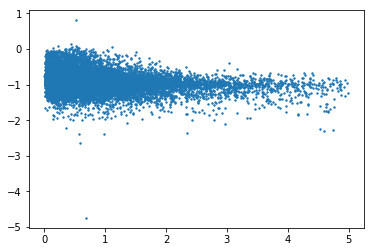

-0.905596811563
0.243936894043


In [9]:
J_G = Jmag-Gmag
plt.scatter(s1,J_G,s=2.0)
plt.show()
JGmean = np.mean(J_G)
JGstd = np.std(J_G)
print(JGmean)
print(JGstd)

 Masked  10  rows based on J-G color > 5 sigma from mean


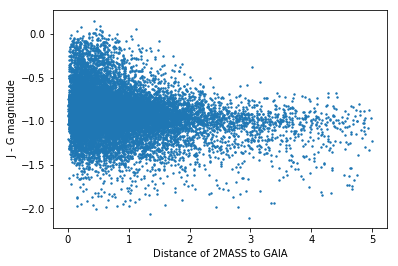

New sigma for J-G:  0.240318796261


In [10]:
#masked rows with J-G greater than 5 sigma from mean
imask = 0
for i in range(0,len(J_G)):
    if(abs(J_G[i] - JGmean) > 5*JGstd):
        imask = imask + 1
        row = t[i]
        idx = row._index
        cols = row._table.columns.values()
        for col in cols:
            col.mask[i] = True
print(" Masked ",imask," rows based on J-G color > 5 sigma from mean")
J_G = Jmag - Gmag
plt.xlabel("Distance of 2MASS to GAIA")
plt.ylabel(" J - G magnitude")
plt.scatter(s1,J_G,s=2.0)
plt.show()
print("New sigma for J-G: ",np.std(J_G))

In [ ]:
#Histogram of G band magnitudes
plt.hist(Gmag)
plt.xlabel('Gmag')
plt.ylabel('Number of Stars')
plt.show()

In [ ]:
#Histogram of J band magnitudes
plt.hist(Jmag)
plt.xlabel('Jmag')
plt.ylabel('Number of Stars')
plt.show()

In [ ]:
#Histogram of K band magnitudes
plt.hist(Kmag, range = [min(Kmag),max(Kmag)])
plt.xlabel('Kmag')
plt.ylabel('Number of Stars')
plt.show()

In [ ]:
#calculate distances and store them in table column
d_data = np.zeros(len(plx))
for i in range(len(d_data)):
    d_data[i] = 1/(plx[i]/1000)
d = Table.Column(data=d_data, name='d')

In [ ]:
#Calculate absolute magnitudes and store them in table column
Abs_mag_data = np.zeros(len(d))
for i in range(len(Abs_mag_data)):
    #Gmag is taken as apparent magnitude
    Abs_mag_data[i] = Gmag[i] - 5*math.log10(d[i]/10)
Abs_mag = Table.Column(data=Abs_mag_data, name='Abs_mag')

In [ ]:
#H-R diagram (with apparent magnitude)
plt.xlim(3500,9000)
plt.scatter(Teff, Gmag,c=d,s=1.0)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Teff')
plt.ylabel('Gmag')
plt.show()

In [ ]:
#H-R diagram (with absolute magnitude)
plt.xlim(3500,9000)
plt.scatter(Teff,Abs_mag,c=d,s=1.0)
plt.xlabel('Absolute Magnitude')
plt.ylabel('Teff')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#Calculate different Color indices
G_J = Gmag-Jmag
J_G = Jmag-Gmag
G_K = Gmag-Kmag
G_H = Gmag-Hmag
J_K = Jmag-Kmag
H_K = Hmag-Kmag

In [ ]:
#Color-Color diagram with G plotted against G-J
plt.scatter(G_J,Gmag, s=1)
plt.xlabel('G-J')
plt.ylabel('G')
plt.show()


In [ ]:
plt.xlabel("J-band App Magnitude")
plt.ylabel("K-band App Magnitude")
plt.scatter(Jmag,Kmag,s=1.0)
plt.show()
plt.xlabel("J-band App Magnitude")
plt.ylabel("H-band App Magnitude")
plt.scatter(Jmag,Hmag,s=1.0)
plt.show()
J_H = Jmag-Hmag
H_K = Hmag-Kmag
# plt.xlim(-1.,1.)
# plt.ylim(-1.,1.)
plt.xlabel("J-H Magnitude")
plt.ylabel("H-K Magnitude")
plt.scatter(J_H,H_K,s=1.0)
plt.show()
plt.xlabel("J-band App Magnitude")
plt.ylabel("Error in J-band Magnitude")
plt.scatter(Jmag,e_Jmag,s=1.0)
plt.show()
plt.xlabel("H-band App Magnitude")
plt.ylabel("Error in H-band Magnitude")
plt.scatter(Hmag,e_Hmag,s=1.0)
plt.show()
plt.xlabel("K-band App Magnitude")
plt.ylabel("Error in K-band Magnitude")
plt.scatter(Kmag,e_Kmag,s=1.0)
plt.show()

In [ ]:
#Color-Color diagram with G-K plotted against G-J
plt.scatter(G_J,G_K, s=1)
plt.xlabel('G-J')
plt.ylabel('G-K')
plt.show()


In [ ]:
#Color-Color diagram with J-K plotted against H-K
plt.scatter(H_K,J_K, s=1)
plt.xlabel('H-K')
plt.ylabel('J-K')
plt.show()

In [ ]:
#check distant matches for G-J
for i in range(len(G_J)):
    if G_J[i] < -2:
        print(t['d_arcsec'][i])

In [ ]:
#check distant matches for G-K
for i in range(len(G_K)):
    if G_K[i] < -2:
        print(t['d_arcsec'][i])

In [ ]:
#check distant matches for G-H
for i in range(len(G_H)):
    if G_H[i] < -2:
        print(t['d_arcsec'][i])

In [ ]:
#check distant matches for H-K
for i in range(len(H_K)):
    if G_H[i] < 0:
        print(t['d_arcsec'][i])

In [ ]:
#Look at spectrial type
print(SpType)

In [11]:
#  Translate Spectra Type luminosity class into a number from 1 to 5
#     or a negative number if it is a binary or unknown spectral type.
#     Note that many stars do not have a luminosity class. There are given 5.1.
#
SpTypeN = [0.0]*len(SpType)
for i in range(0,len(SpType)):
    if(SpType.mask[i] == False):
        SpT = SpType[i].decode()
        if(len(SpT) > 2):
            for j in range(0,len(SpT)):
                if(SpT[j] == 'I'):
                    SpTypeN[i] = SpTypeN[i] + 1
                if(SpT[j] == 'V'):
                    SpTypeN[i] = SpTypeN[i] + 5
                if(SpT[j] == '+'):
                    SpTypeN[i] = -20.
                
        else:
            SpTypeN[i] = 5.1
        
        if(SpTypeN[i] == 6):
            SpTypeN[i] = 4.
        if(SpTypeN[i] == 11):
            SpTypeN[i] = 4.5
        if(SpTypeN[i] == 9):
            SpTypeN[i] = 3.5
        if(SpTypeN[i] > 5.2):
            SpTypeN[i] = -30.
print("Finished Luminosity Class Translation")
count = 0
for i in range(0,len(SpType)):
    if(SpTypeN[i] < 0.):
        count = count + 1
test = SpType.compressed()
good = len(test) - count
print("  Number of single Stars: ",good,"  Binaries or Unknown luminosity class: ",count)

Finished Luminosity Class Translation
  Number of single Stars:  19775   Binaries or Unknown luminosity class:  207


In [12]:
print(SpTypeN[0:30])

[0.0, 0.0, 0.0, 5.0, 5.1, 5.1, 0.0, 4.0, 5.1, 5.0, 0.0, 5.1, 0.0, 0.0, 5.1, 5.1, 0.0, 0.0, 5.0, 5.1, -20.0, 5.1, 5.0, 0.0, 0.0, 4.0, 5.0, 5.1, 5.0, -20.0]


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


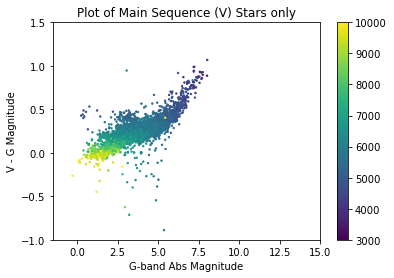

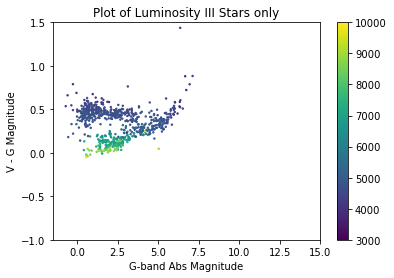

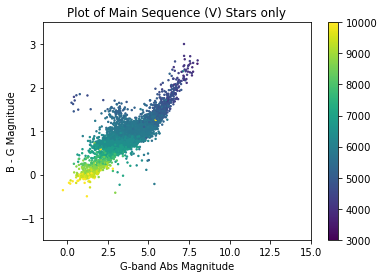

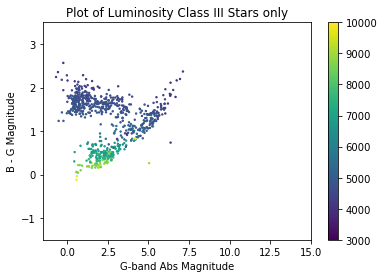

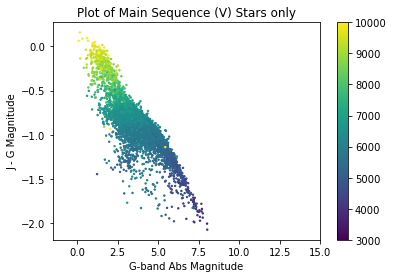

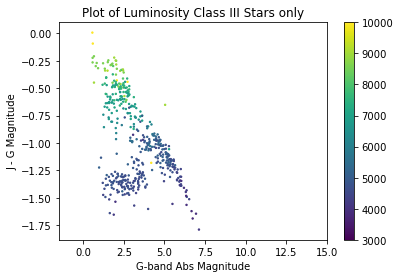

In [13]:
Dist = 1000./t["Plx"]
Vmags = t['VTmag'] + 5 - 5*np.log10(Dist)
Bmags = t['BTmag'] + 5 - 5*np.log10(Dist)
Gmags = t['__Gmag_'] + 5 - 5*np.log10(Dist)
Jmags = t['Jmag'] + 5 - 5 * np.log10(Dist)
Hmags = t['Hmag'] + 5 - 5 * np.log10(Dist)
Kmags = t['Kmag'] + 5 - 5 * np.log10(Dist)
Teff = t["Teff"]
VmG = Vmags - Gmags
BmG = Bmags - Gmags
JmG = Jmags - Gmags
for i in range(0,len(VmG)):
    if(SpTypeN[i] > 4.9 and SpTypeN[i] < 5.05):
        VmG.mask[i] = False
    else:
        VmG.mask[i] = True
plt.xlim(-1.5,15)
plt.ylim(-1.0,1.5)
plt.title("Plot of Main Sequence (V) Stars only")
plt.xlabel("G-band Abs Magnitude")
plt.ylabel("V - G Magnitude")
plt.scatter(Gmags,VmG,s=2.0,c=Teff,vmin=3000,vmax=10000)
plt.colorbar()
plt.show()
for i in range(0,len(VmG)):
    if(SpTypeN[i] > 2.9 and SpTypeN[i] < 3.1):
        VmG.mask[i] = False
    else:
        VmG.mask[i] = True
plt.xlim(-1.5,15)
plt.ylim(-1.0,1.5)
plt.title("Plot of Luminosity III Stars only")
plt.xlabel("G-band Abs Magnitude")
plt.ylabel("V - G Magnitude")
plt.scatter(Gmags,VmG,s=2.0,c=Teff,vmin=3000,vmax=10000)
plt.colorbar()
plt.show()
for i in range(0,len(VmG)):
    if(SpTypeN[i] > 4.9 and SpTypeN[i] < 5.05):
        BmG.mask[i] = False
    else:
        BmG.mask[i] = True
plt.title("Plot of Main Sequence (V) Stars only")
plt.xlabel("G-band Abs Magnitude")
plt.ylabel("B - G Magnitude")
plt.xlim(-1.5,15.)
plt.ylim(-1.5,3.5)
plt.scatter(Gmags,BmG,s=2.0,c=Teff,vmin=3000,vmax=10000)
plt.colorbar()
plt.show()
for i in range(0,len(VmG)):
    if(SpTypeN[i] > 2.9 and SpTypeN[i] < 3.1):
        BmG.mask[i] = False
    else:
        BmG.mask[i] = True
plt.title("Plot of Luminosity Class III Stars only")
plt.xlabel("G-band Abs Magnitude")
plt.ylabel("B - G Magnitude")
plt.xlim(-1.5,15.)
plt.ylim(-1.5,3.5)
plt.scatter(Gmags,BmG,s=2.0,c=Teff,vmin=3000,vmax=10000)
plt.colorbar()
plt.show()

for i in range(0,len(JmG)):
    if(SpTypeN[i] > 4.9 and SpTypeN[i] < 5.05):
        JmG.mask[i] = False
        if(Jmags.mask[i] == True):
            JmG.mask[i] = True
    else:
        JmG.mask[i] = True
plt.title("Plot of Main Sequence (V) Stars only")
plt.xlabel("G-band Abs Magnitude")
plt.ylabel("J - G Magnitude")
plt.xlim(-1.5,15.)
#plt.ylim(-1.0,3.0)
plt.scatter(Gmags,JmG,s=2.0,c=Teff,vmin=3000,vmax=10000)
plt.colorbar()
plt.show()
for i in range(0,len(JmG)):
    if(SpTypeN[i] > 2.9 and SpTypeN[i] < 3.1):
        JmG.mask[i] = False
        if(Jmags.mask[i] == True):
            JmG.mask[i] = True
    else:
        JmG.mask[i] = True
plt.title("Plot of Luminosity Class III Stars only")
plt.xlabel("G-band Abs Magnitude")
plt.ylabel("J - G Magnitude")
plt.xlim(-1.5,15.)
#plt.ylim(-1.0,3.0)
plt.scatter(Gmags,JmG,s=2.0,c=Teff,vmin=3000,vmax=10000)
plt.colorbar()
plt.show()